In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

import mpl_style
plt.style.use(mpl_style.style1)

In [2]:
def read_params(fname):
    params = {}
    with open(fname) as f:
        for line in f:
            (key, val) = line.split()
            try:
                params[key] = float(val)
                if params[key] == int(params[key]):
                    params[key] = int(params[key])
            except:
                params[key] = val
    return params

In [3]:
def read_stars(fname, is_double = True):
    if is_double:
        dtype = np.float64
    else:
        dtype = np.float32

    with open(fname) as f:
        nstars = np.fromfile(f, dtype=np.int32, count=1)[0]
        rectangular = np.fromfile(f, dtype=np.int32, count=1)[0]
        corner = np.fromfile(f, dtype=dtype, count=2)
        theta_e = np.fromfile(f, dtype=dtype, count=1)[0]
        stars = np.fromfile(f, dtype=dtype)
        stars = stars.reshape(nstars, 3)

    return stars

In [4]:
def write_stars(fname, nstars, rectangular, corner, theta_e, stars, is_double = True):
    if is_double:
        dtype = 'd'
    else:
        dtype = 'f'

    with open(fname, 'wb') as f:
        s = struct.pack('i', nstars)
        f.write(s)
        s = struct.pack('i', rectangular)
        f.write(s)
        s = struct.pack(dtype * 2, *corner)
        f.write(s)
        s = struct.pack(dtype, theta_e)
        f.write(s)
        s = struct.pack(dtype * len(stars.ravel()), *stars.ravel())
        f.write(s)
        f.close()

In [46]:
def read_array(fname, is_double = True):
    if is_double:
        dtype = np.float64
    else:
        dtype = np.float32

    with open(fname) as f:
        nrows, ncols = np.fromfile(f, dtype=np.int32, count=2)
        dat = np.fromfile(f, dtype=dtype)
        dat = dat.reshape(nrows,ncols,2)
    return dat

In [6]:
is_double = True
prefix = ''
prefix = f'{prefix}ccf_'

In [7]:
params = read_params(f'{prefix}parameter_info.txt')
params

{'kappa_tot': 0.4,
 'shear': 0.4,
 'mu_ave': 5,
 'smooth_fraction': 0,
 'kappa_star': 0.4,
 'kappa_star_actual': 0.408921683,
 'theta_star': 1,
 'random_seed': 127817537,
 'mass_function': 'salpeter',
 'm_solar': 1,
 'm_lower': 0.1,
 'm_upper': 10,
 'mean_mass': 0.309371445,
 'mean_mass2': 0.394418372,
 'mean_mass2_ln_mass': 0.397221431,
 'm_lower_actual': 0.1000157,
 'm_upper_actual': 9.51144074,
 'mean_mass_actual': 0.31627173,
 'mean_mass2_actual': 0.447522919,
 'mean_mass2_ln_mass_actual': 0.501690201,
 'num_stars': 10000,
 'corner_x1': 34.8553988,
 'corner_x2': 174.276994,
 'taylor_smooth': 209,
 'num_roots': 20208,
 'num_phi': 200,
 'num_branches': 1,
 'max_error_1/mu': 6693094289999999521287465463226388157846956936592279732224,
 't_init_roots': 0.391,
 't_ccs': 6.661,
 't_caustics': 0.036}

In [8]:
stars = read_stars(f'{prefix}stars.bin')
print(stars.shape)

(10000, 3)


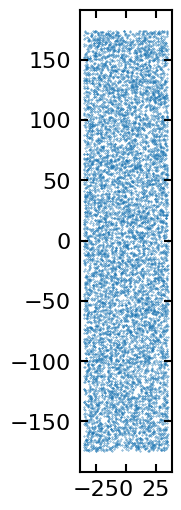

In [9]:
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=0.1)
ax.set_aspect(1)
plt.show()

In [47]:
dat = read_array(f'{prefix}caustics.bin', is_double)

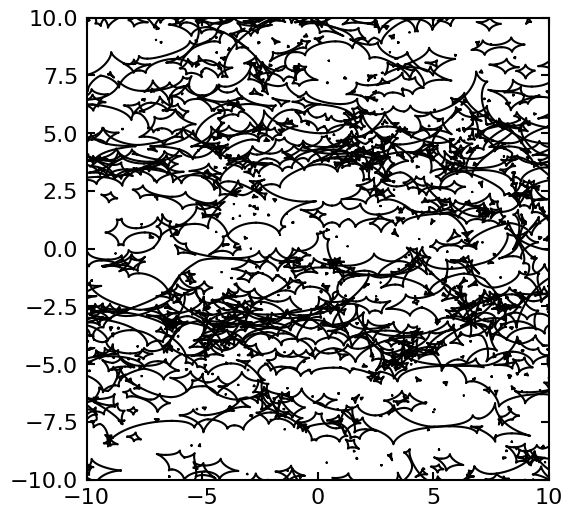

In [60]:
fix, ax = plt.subplots()
for what in dat:
    ax.plot(*(what.T), color='black')
ax.set_aspect(1)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()